# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#  Load the data into a pandas DataFrame

In [2]:
data = pd.read_csv('Rainfall prediction.csv')

# Remove non-numeric values in the dataset

In [3]:
data = data.dropna()

# Encode non-numeric values

In [4]:
data_encoded = pd.get_dummies(data, drop_first=True)

# Data Preprocessing

In [5]:
X = data_encoded.drop(['ANNUAL'], axis=1)
y = data_encoded['ANNUAL']

# Split the data into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [8]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [9]:
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Train RMSE: 0.06
Test RMSE: 0.06
R-squared: 1.00


# visualization 

Text(0.5, 1.0, 'Feature Importance Plot')

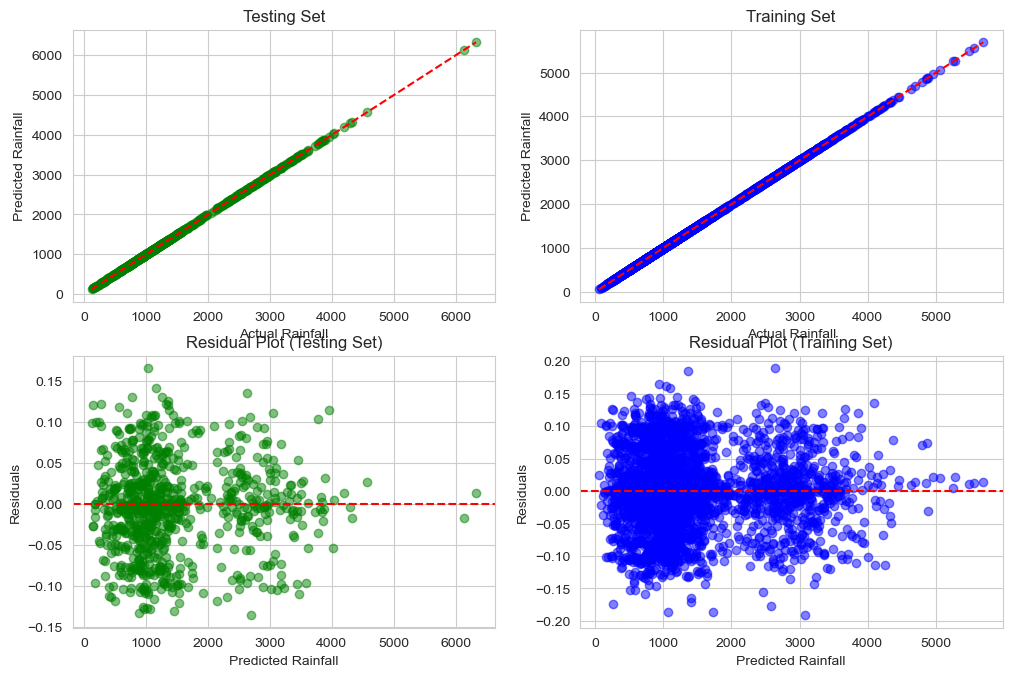

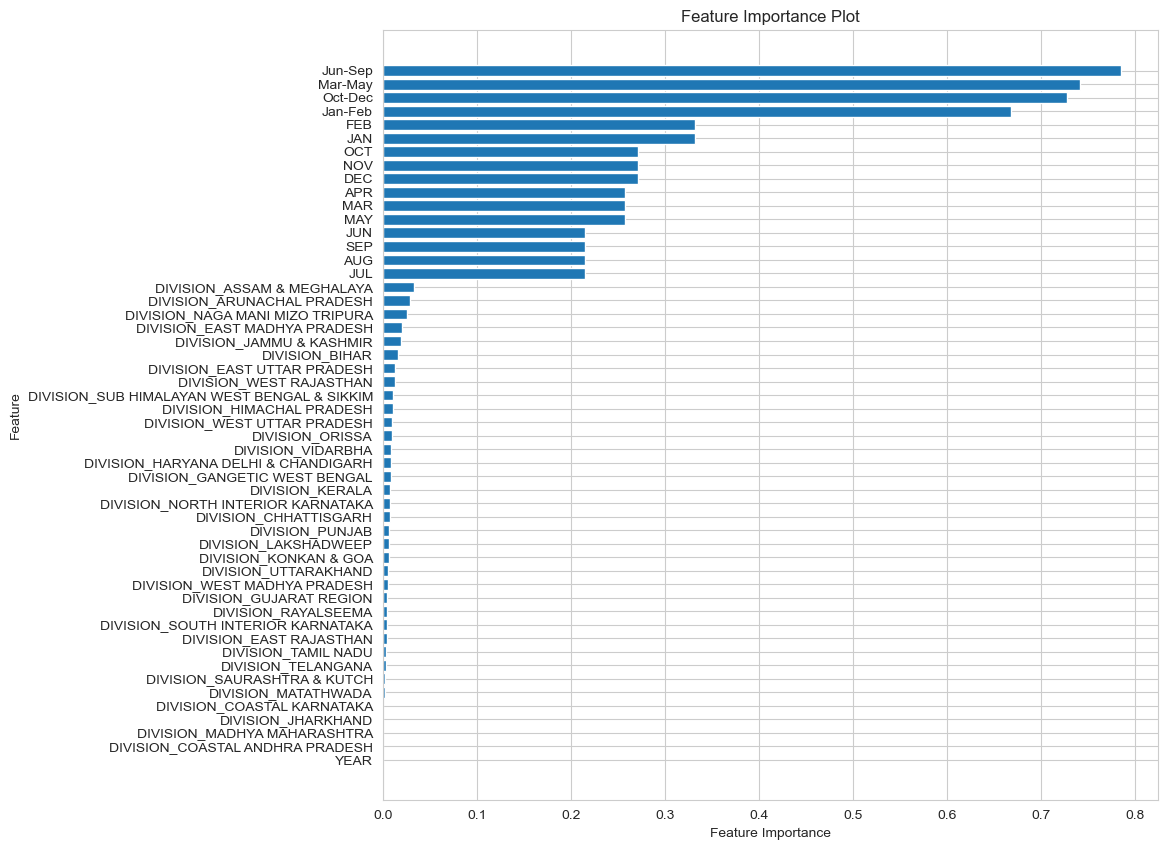

In [10]:
plt.figure(figsize=(12, 12))
sns.set_style('whitegrid')

# Scatter plot of actual vs predicted values for testing set
plt.subplot(3, 2, 1)
plt.scatter(y_test, y_pred_test, color='g', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Testing Set')

# Scatter plot of actual vs predicted values for training set
plt.subplot(3, 2, 2)
plt.scatter(y_train, y_pred_train, color='b', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Training Set')

# Residual plot for testing set
plt.subplot(3, 2, 3)
residuals_test = y_test - y_pred_test
plt.scatter(y_pred_test, residuals_test, color='g', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.title('Residual Plot (Testing Set)')

# Residual plot for training set
plt.subplot(3, 2, 4)
residuals_train = y_train - y_pred_train
plt.scatter(y_pred_train, residuals_train, color='b', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.title('Residual Plot (Training Set)')

# Feature importance plot

feature_importance = np.abs(model.coef_)
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)

# Feature importance plot
plt.figure(figsize=(10,10))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx])
plt.yticks(range(len(feature_importance)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')